In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential, Model

In [31]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=10

In [3]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.3) 

train_generator = data_generator.flow_from_directory(
   r"C:\Users\ADMIN\Downloads\potato", 
    target_size =(IMAGE_SIZE, IMAGE_SIZE), 
    batch_size = BATCH_SIZE,
    shuffle = True,
    class_mode = 'categorical',
    subset='training',
    seed = 42,)

validation_generator = data_generator.flow_from_directory( 
    r"C:\Users\ADMIN\Downloads\potato", 
    target_size =(IMAGE_SIZE, IMAGE_SIZE), 
    batch_size =BATCH_SIZE,
    shuffle = True,
    class_mode = 'categorical',
    subset='validation',
    seed = 42)

Found 1507 images belonging to 3 classes.
Found 645 images belonging to 3 classes.


In [23]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
history=model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
48/48 [==============================] - 6s 118ms/step - loss: 0.4878 - accuracy: 0.8281 - val_loss: 0.5278 - val_accuracy: 0.7969
Epoch 2/10
48/48 [==============================] - 5s 109ms/step - loss: 0.4376 - accuracy: 0.8388 - val_loss: 0.4384 - val_accuracy: 0.8512
Epoch 3/10
48/48 [==============================] - 5s 110ms/step - loss: 0.3940 - accuracy: 0.8474 - val_loss: 0.4077 - val_accuracy: 0.8496
Epoch 4/10
48/48 [==============================] - 5s 111ms/step - loss: 0.3344 - accuracy: 0.8719 - val_loss: 0.3535 - val_accuracy: 0.8574
Epoch 5/10
48/48 [==============================] - 5s 100ms/step - loss: 0.2845 - accuracy: 0.8971 - val_loss: 0.2916 - val_accuracy: 0.8853
Epoch 6/10
48/48 [==============================] - 5s 103ms/step - loss: 0.3313 - accuracy: 0.8759 - val_loss: 0.3103 - val_accuracy: 0.8868
Epoch 7/10
48/48 [==============================] - 5s 103ms/step - loss: 0.2422 - accuracy: 0.9098 - val_loss: 0.2918 - val_accuracy: 0.8791
Epoch 

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

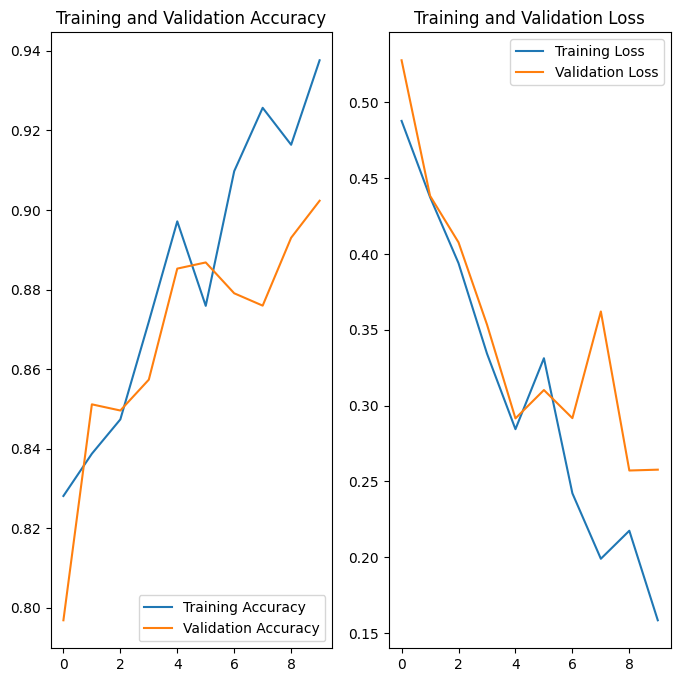

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
new_model = Model(inputs=model.input, outputs=model.layers[-2].output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_input (InputLaye  [(None, None, None, None  0        
 r)                          )]                                  
                                                                 
 sequential (Sequential)     (None, 224, 224, None)    0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0     

In [36]:
train_features = model.predict(train_generator)

48/48 [==============================] - 4s 81ms/step


In [37]:
validation_features = model.predict(validation_generator)

21/21 [==============================] - 2s 70ms/step


In [7]:
train_features.shape

(1507, 7, 7, 512)

In [8]:
validation_features.shape

(645, 7, 7, 512)

In [46]:
len(train_generator.labels)

1507

In [65]:
len(validation_generator.labels)

645

In [38]:
x_train, x_test, y_train, y_test = train_features,validation_features,train_generator.labels,validation_generator.labels

In [17]:
len(y_train)

1507

In [31]:
len(y_test)

645

In [14]:
x_train.shape[1:]

(7, 7, 512)

In [39]:
n_samples = x_train.shape[0]
n_features = np.prod(x_train.shape[1:])
x_train = np.reshape(x_train, (n_samples, n_features))

In [11]:
x_train.shape

(1507, 25088)

In [40]:
n_samples1 = x_test.shape[0]
n_features1 = np.prod(x_test.shape[1:])
x_test = np.reshape(x_test, (n_samples1, n_features1))

In [18]:
n_features1

51200

In [41]:
import pandas as pd

In [42]:
x_traindf = pd.DataFrame(x_train)

In [43]:
x_testdf = pd.DataFrame(x_test)

In [13]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import random
import math 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [44]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_val_pred = rf.predict(x_test)
print( accuracy_score(y_test, y_val_pred))

0.4883720930232558


In [45]:

def fitness(features_mask):
    # select the features based on the binary mask
    selected_features = x_train[:, features_mask.astype(bool)]
    # train and evaluate a KNN classifier using the selected features
    #print(len(selected_features))
    #knn = KNeighborsClassifier(n_neighbors=204)
    #kmeans = KMeans(n_clusters=i)
    #kmeans.fit(data)
    rf = RandomForestClassifier()
    rf.fit(selected_features, y_train)
    #svm = SVC(kernel="linear", random_state=42)
    #svm.fit(selected_features, y_train)
    #knn.fit(selected_features, y_train)
    #print("hi")
    #y_val_pred = knn.predict(x_test[:, features_mask.astype(bool)])
    #y_val_pred = svm.predict(x_test[:, features_mask.astype(bool)])
    y_val_pred = rf.predict(x_test[:, features_mask.astype(bool)])
    #print(len(y_val_pred))
    #print(accuracy_score(y_test, y_val_pred))
    return accuracy_score(y_test, y_val_pred)

    
######### Moth Flame Algo ############
def MFO(x_train, y_train, x_test, y_test, Max_iteration,n):
    
    length=len(x_train.iloc[0])
    size1=int(length)
    
    moth_population=np.zeros(shape=(n,size1))
    fitness_of_moths = np.zeros(n)

    ########## Initialisation of solutions randomly ##############
    for i in range(0,n):
            # for j in range(0,size):
            #     if j==0:
            #         r=random.randint(0,length-1)
            #         while( (length-1-r)<(size-j-1) ):
            #             r=random.randint(0,length-1)
            #         moth_population[i][j]=r
            #     else:
            #         r=random.randint(0,length-1)
            #         while( ((length-1-r)<(size-j-1) ) or moth_population[i][j-1]>=r):
            #             r=random.randint(0,length-1)
                    # moth_population[i][j]=r
                    
        moth_population[i]=np.random.randint(2, size=size1)
    previous_population=0
    previous_fitness=0
    
    # Max_iteration=m  
    ############ Begin of Algo ##############
    for Iteration in range(1,Max_iteration+1):
        
        
        print(str(Iteration), end=" ")
        Flame_no = round(n-Iteration*((n-1)/Max_iteration));
        
        for i in range(0,n):
            fitness_of_moths[i] = fitness(moth_population[i]) # calculation of fitness
        
        
        if Iteration==1:
             best_flame_fitness = np.sort(fitness_of_moths)[::-1] # getting best flames
             I = np.argsort(fitness_of_moths)[::-1]
             best_flames = moth_population[I]
            
        else:
            double_population = np.concatenate((previous_population,best_flames))
            double_fitness=np.concatenate((previous_fitness, best_flame_fitness))
            
            double_fitness_sorted = np.sort(double_fitness)[::-1]
            I=np.argsort(double_fitness)[::-1]
            double_sorted_population = double_population[I]
            
            best_flame_fitness = double_fitness_sorted[0:n] # getting best flames
            best_flames = double_sorted_population[0:n]
            
        Best_flame_score=best_flame_fitness[0] # the best flame
        print(str(Best_flame_score), end=" ")
        Best_flame_pos=best_flames[0]
      
        previous_population=moth_population
        previous_fitness=fitness_of_moths
            
        a=-1 + Iteration*((-1)/Max_iteration);   
        
        for i in range(0,n):
            for j in range(0,size1):
                
                if i<=Flame_no:
                    distance_to_flame = abs(best_flames[i][j] - moth_population[i][j])
                    b = 1
                    t = (a-1)*random.random() + 1
                    moth_population[i][j] = round(distance_to_flame*math.exp(b*t)*math.cos(t*2*math.pi) + best_flames[i][j]) # updating moth population
                    
                    if moth_population[i][j]<0: # Bringinging back to search space
                        moth_population[i][j]=0
                    
                    if moth_population[i][j]>length-1: # Bringinging back to search space
                        moth_population[i][j]=length-1
                    
                else:
                    distance_to_flame = abs(best_flames[i][j] - moth_population[i][j])
                    b = 1
                    t = (a-1)*random.random() + 1
                    moth_population[i][j] = round(distance_to_flame*math.exp(b*t)*math.cos(t*2*math.pi) + best_flames[Flame_no][j]) # updating moth population
                    
                    if moth_population[i][j]<0: # Bringinging back to search space
                        moth_population[i][j]=0
                        
                    if moth_population[i][j]>length-1: # Bringinging back to search space
                        moth_population[i][j]=length-1
    
        #print("Iteration = " + str(Iteration))
        #print()
        
    return best_flames, Best_flame_score

In [ ]:
best_flames, Best_flame_score=MFO(x_traindf, y_train, x_testdf, y_test, 1000,5)

In [ ]:
Best_flame_score

In [ ]:
solution=np.ones(n_features)
solution

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# define the number of solutions in the population and the maximum number of iterations
n_pop = 1
max_iter = 20
population = initialize_population(n_pop, n_features)
best_solution,best_fitness = moth_flame_optimization(population, max_iter)

In [ ]:
best_fitness

In [ ]:
list(best_solution).count(1)

664

In [ ]:
# extract the indices of the selected features in the best solution
selected_feature_indicestrain = [i for i in range(len(best_solution)) if best_solution[i] > 0]

# extract the selected features from the original feature matrix
selected_featurestrain = X_train[:, selected_feature_indicestrain]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
selected_featurestrain.shape

(9529, 664)

In [ ]:
test_generator = data_generator.flow_from_directory( 
    r"C:\Users\ADMIN\Downloads\2 test-20230502T091229Z-001\2 test", 
    target_size =(IMAGE_SIZE, IMAGE_SIZE), 
    batch_size =BATCH_SIZE,
    shuffle = True,
    class_mode = 'categorical',
    seed = 42)

Found 35 images belonging to 2 classes.


In [ ]:
test_features = model.predict(test_generator)

2/2 [==============================] - 1s 131ms/step


In [ ]:
len(train_generator.labels)

9529

In [ ]:
selected_feature_indices1 = [i for i in range(len(best_solution)) if best_solution[i] > 0]
selected_features1 = test_features[:, selected_feature_indices1]

In [ ]:
selected_features = X_train[:,selected_feature_indices1]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(selected_features, y_train)
y_pred = knn.predict(X_test[:,selected_feature_indices1])